# Diabetes Prediction

## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('diabetes_prediction_dataset.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


#### Shape of the Dataset

In [3]:
data.shape

(100000, 9)

In [4]:
data['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

* 0 => Non Diabetic 
* 1 => Diabetic

#### Diabetic Patients

In [5]:
df=data.query('diabetes==1')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
99935,Female,65.0,1,1,never,33.55,8.2,140,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1
99962,Female,58.0,1,0,never,38.31,7.0,200,1


* There are a total of 8500 people who are diabetic

##### checking for null values to treat them

In [6]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


* Changing the datatype of age from float to int

In [9]:
data=data.astype({'age':int})

## Data Visualization 

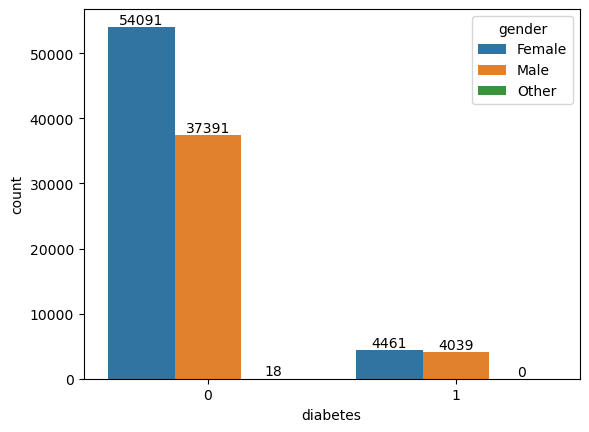

In [10]:
gen=sns.countplot(x='diabetes',data=data,hue='gender')

for bar in gen.containers:
    gen.bar_label(bar)

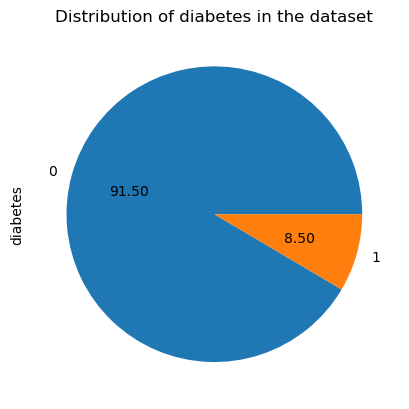

In [11]:
data.diabetes.value_counts().plot(kind='pie',autopct='%0.2f')
plt.title("Distribution of diabetes in the dataset")
plt.show()

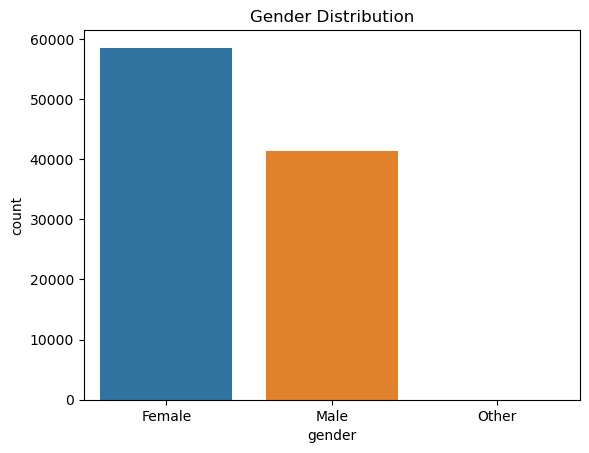

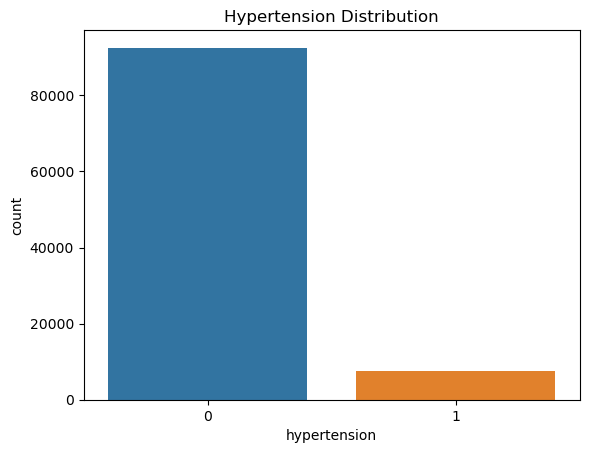

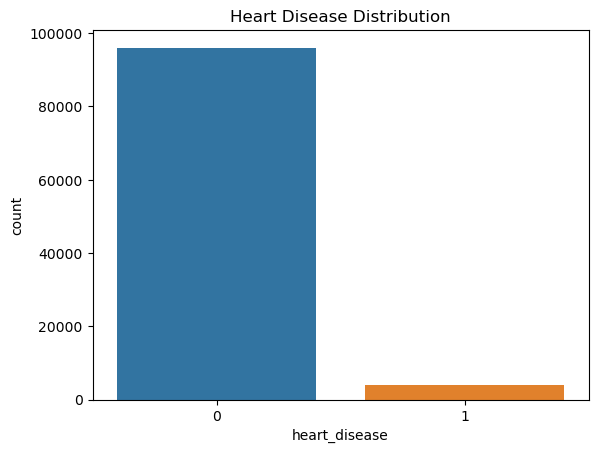

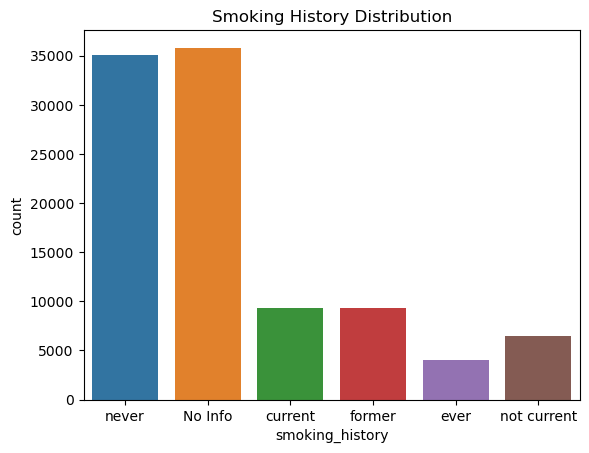

In [12]:
# Bar plots for categorical variabels
sns.countplot(x="gender", data=data)
plt.title("Gender Distribution")
plt.show()

sns.countplot(x="hypertension", data=data)
plt.title("Hypertension Distribution")
plt.show()

sns.countplot(x="heart_disease", data=data)
plt.title("Heart Disease Distribution")
plt.show()

sns.countplot(x="smoking_history", data=data)
plt.title("Smoking History Distribution")
plt.show()

In [13]:
col=['age','bmi','HbA1c_level','blood_glucose_level']

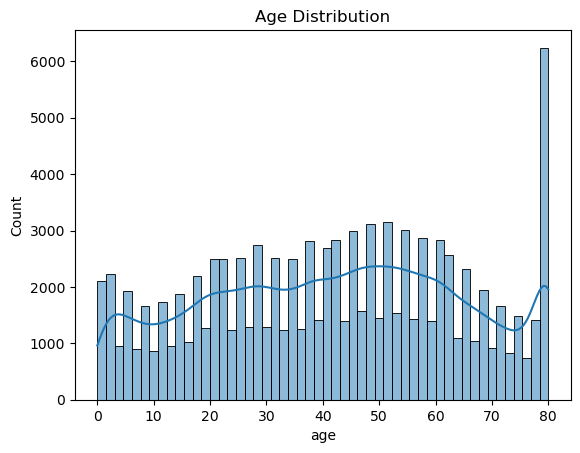

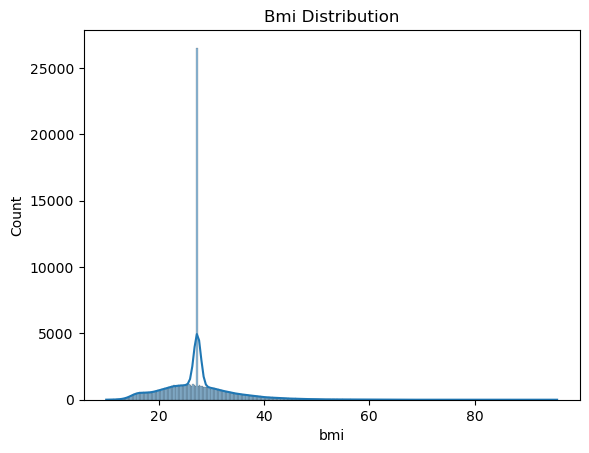

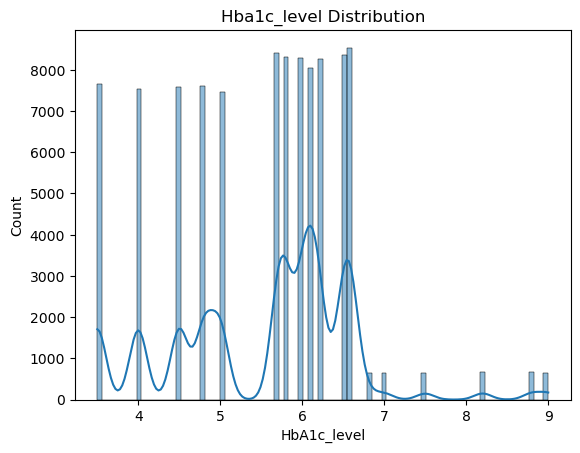

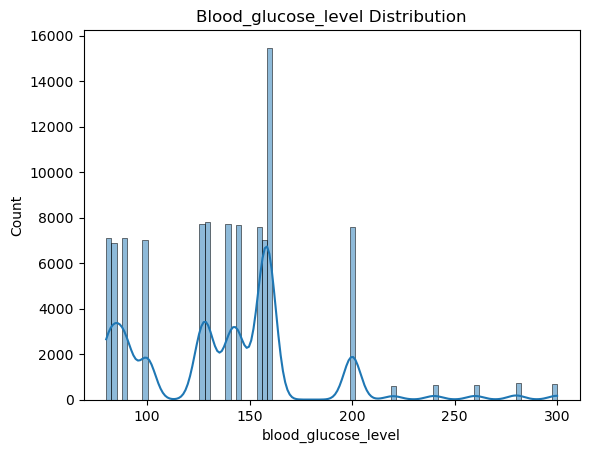

In [14]:
for factor in col:
    sns.histplot(x=factor,data=data,kde=True)
    plt.title(factor.capitalize()+" Distribution")
    plt.show()

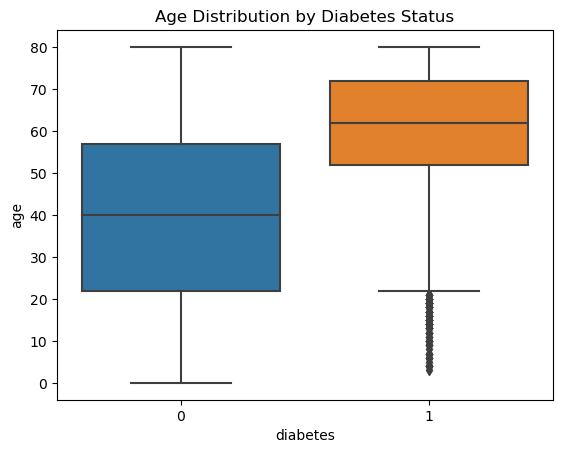

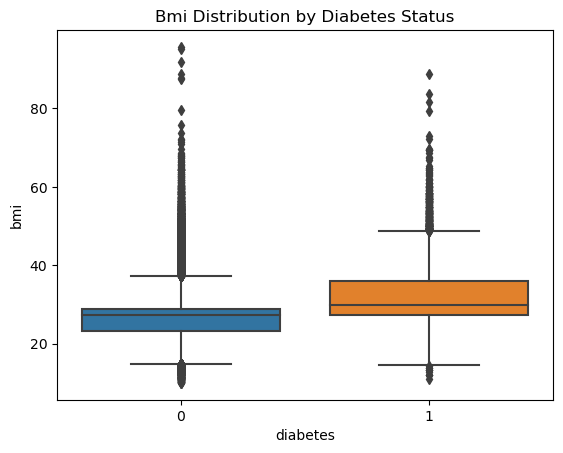

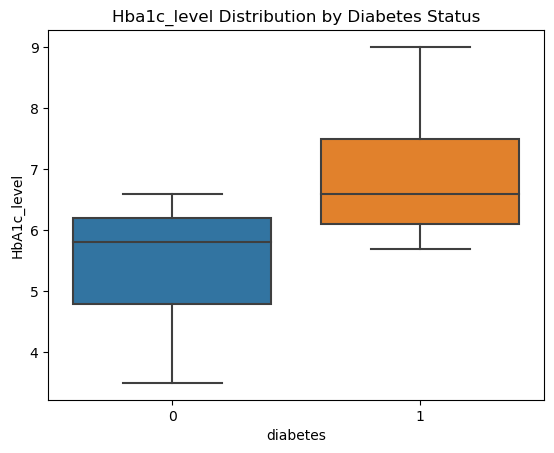

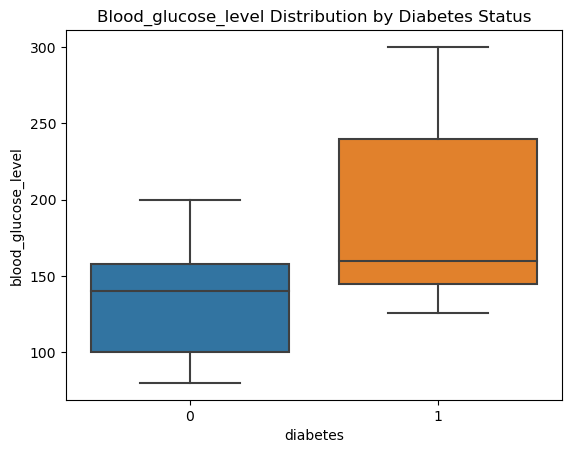

In [15]:
for factor in col:
    sns.boxplot(x='diabetes',y=factor,data=data)
    plt.title(factor.capitalize()+" Distribution by Diabetes Status")
    plt.show()

* people having bmi over 30 ,and hbac level over 6 and blood glucose level over 180 are having diabetes

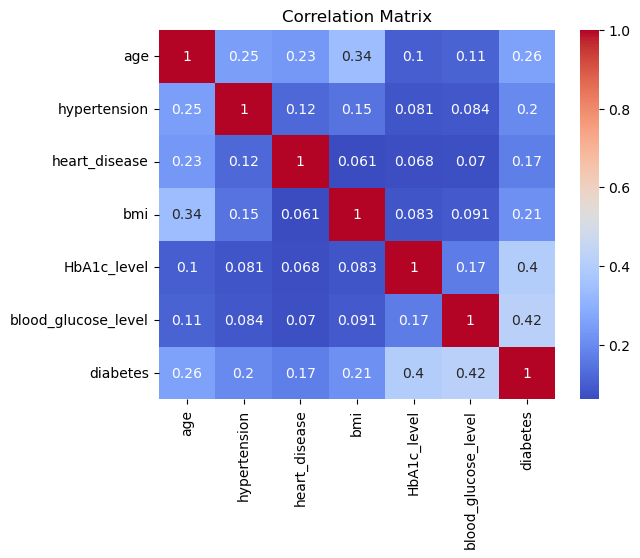

In [16]:
# Correlation matrix to visualize the correlation between variables
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#### Splitting into Train and Test

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.iloc[:,0:8],data.iloc[:,-1],test_size=0.3,stratify=data.iloc[:,-1],random_state=42)

In [18]:
X_train.shape,X_test.shape

((70000, 8), (30000, 8))

In [19]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
54534,Female,56,0,1,never,39.51,4.0,100
7286,Male,64,0,0,former,27.32,6.6,90
44496,Male,49,0,0,never,42.26,6.0,240
86010,Male,68,0,0,No Info,27.32,4.8,85
44954,Male,62,0,0,not current,30.64,5.7,145


## Feature Engineering

### One Hot Encoding => 
    * To transform the categorical column to numerical column

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [21]:
trf1=ColumnTransformer([('OHE_Gender_SmokingHistory',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,4])],remainder='passthrough')

In [22]:
trf1

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE_Gender_SmokingHistory',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 [0, 4])])

### Scaling =>
    * To scale down the value between range [-1 to 1]

In [23]:
trf2=ColumnTransformer([('scale',MinMaxScaler(),slice(0,15))])

In [24]:
trf2

ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 15, None))])

### Training the Model
    * Using DecisionTreeClassifier algorithm to train the model

In [25]:
from sklearn.tree import DecisionTreeClassifier

trf3=DecisionTreeClassifier()

In [26]:
trf3

DecisionTreeClassifier()

In [27]:
from sklearn.pipeline import Pipeline,make_pipeline

pipe=Pipeline([('trf1',trf1),('trf2',trf2),('trf3',trf3)])

In [28]:
pipe

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE_Gender_SmokingHistory',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 4])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 15, None))])),
                ('trf3', DecisionTreeClassifier())])

In [29]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE_Gender_SmokingHistory',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 4])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 15, None))])),
                ('trf3', DecisionTreeClassifier())])

In [30]:
from sklearn import set_config
set_config(display='diagram')

### Checking Accuracy 

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#### For Train Dataset

In [32]:
pred1=pipe.predict(X_train)
print("Accuracy of Training data set is : ",accuracy_score(y_train,pred1))

Accuracy of Training data set is :  0.9992285714285715


In [33]:
# CHECKING ACCURACY USING CROSS VALIDATION
print("Accuracy after Cross Validation :",cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean())

Accuracy after Cross Validation : 0.9509285714285713


#### For Test Dataset

In [34]:
pred2=pipe.predict(X_test)
print("Accuracy of Test data set is : ",accuracy_score(y_test,pred2))

Accuracy of Test data set is :  0.9524


In [35]:
# CHECKING ACCURACY USING CROSS VALIDATION
print("Accuracy after Cross Validation :",cross_val_score(pipe, X_test, y_test, cv=5, scoring='accuracy').mean())

Accuracy after Cross Validation : 0.9538333333333334


### Testing Different Inputs for the model

In [36]:
import pickle
pickle.dump(pipe,open('pipe.pkl1','wb'))
pipe=pickle.load(open('pipe.pkl1','rb'))

In [37]:
def Output(prediction):
    print(prediction)
    if (prediction[0]==1):
        print("The person is Diabetic")
    else:
        print("The person is not Diabetic")

In [38]:
test_input=np.array(['male',50,1,1,'current',32.8,6.3,230],dtype=object).reshape(1,8)
Output(pipe.predict(test_input))

[1]
The person is Diabetic


In [39]:
test_input1=np.array(['female',50,0,1,'former',31.8,6.1,100],dtype=object).reshape(1,8)
Output(pipe.predict(test_input1))

[0]
The person is not Diabetic


In [40]:
test_input2=np.array(['male',50,0,1,'former',34.8,6.4,220],dtype=object).reshape(1,8)
Output(pipe.predict(test_input2))

[1]
The person is Diabetic


People having higher bmi and high blood glucose level are most likely to be diabetic

## Model Training using DecisionTreeClassifier

In [41]:
# change the values from smoking_history and gender columns to numbers

data.smoking_history=data.smoking_history.astype('category').cat.codes
data.gender=data.gender.astype('category').cat.codes
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,4,25.19,6.6,140,0
1,0,54,0,0,0,27.32,6.6,80,0
2,1,28,0,0,4,27.32,5.7,158,0
3,0,36,0,0,1,23.45,5.0,155,0
4,1,76,1,1,1,20.14,4.8,155,0


<Axes: >

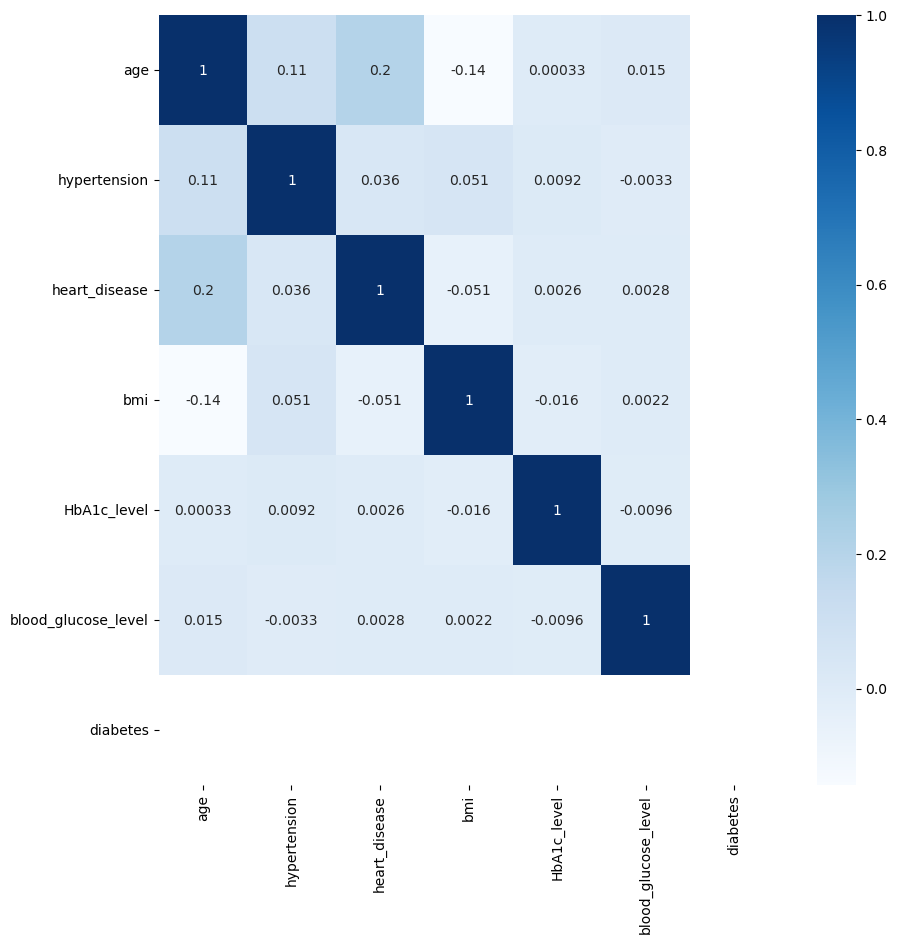

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmax=1, annot=True, cmap='Blues')

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

dtc = DecisionTreeClassifier()

In [44]:
X=data.loc[:,data.columns!='diabetes']
y=data.diabetes

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [46]:
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100).__format__('.2f'),"%")

Accuracy: 95.20 %


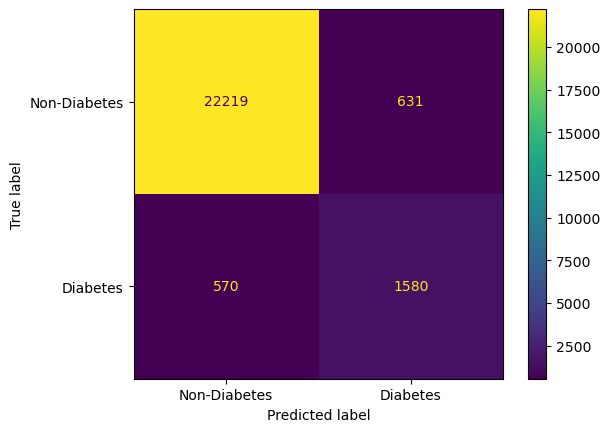

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Non-Diabetes', 'Diabetes']).plot()
plt.show()

* Reduced Columns

In [48]:
X_reduced = data[['HbA1c_level', 'blood_glucose_level']]
y_reduced = data.diabetes

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced,y_reduced,test_size=0.25, random_state=42)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)

In [50]:
print("Accuracy:",(metrics.accuracy_score(y_test, pred)*100).__format__('.2f'),"%")

Accuracy: 97.12 %


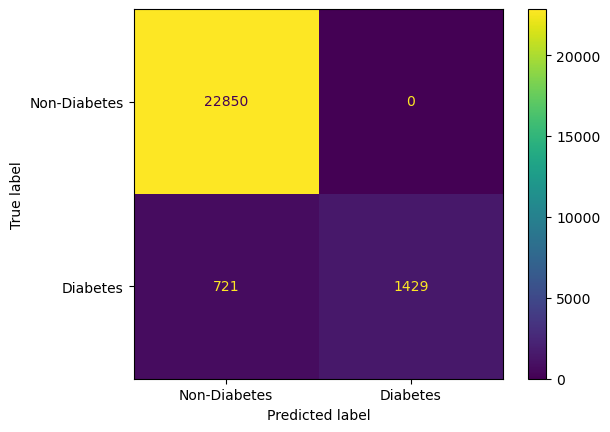

In [51]:
cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(cm, display_labels=['Non-Diabetes', 'Diabetes']).plot()
plt.show()

* Adding variables

In [52]:
X = data[['age', 'HbA1c_level', 'blood_glucose_level']]
y = data.diabetes

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)

In [54]:
print("Accuracy:",(metrics.accuracy_score(y_test, pred)*100).__format__('.2f'),"%")

Accuracy: 96.95 %


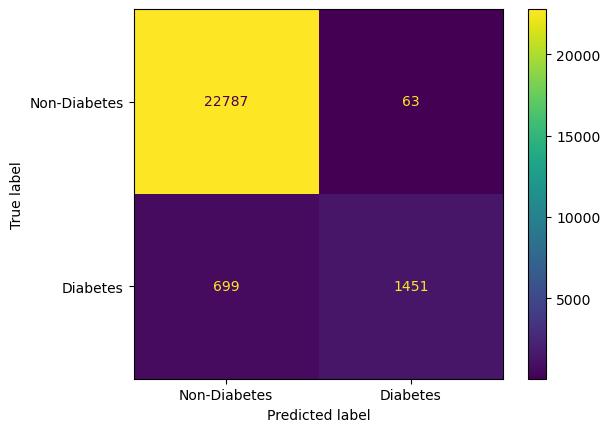

In [55]:
cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(cm, display_labels=['Non-Diabetes', 'Diabetes']).plot()
plt.show()

The models did a good job predicting.